In [1]:
import os  # all the librarys that we will use
import pandas as pd
import numpy as np
import seaborn as sns
import math
##
import scipy.io
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download saurabhshahane/fake-news-classification
! unzip fake-news-classification.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
 97% 89.0M/92.1M [00:01<00:00, 78.5MB/s]
100% 92.1M/92.1M [00:01<00:00, 72.4MB/s]
Archive:  fake-news-classification.zip
  inflating: WELFake_Dataset.csv     


In [3]:
#df = pd.read_csv("/content/WELFake_Dataset.csv")
df = pd.read_csv("./WELFake_Dataset.csv")
df = df.sample(frac=0.03)
df.head()

#pd.read_csv("./dataset/gossipcop_fake.csv")
#pd.read_csv("./BuzzFeed_fake_news_content.csv")

,Unnamed: 0,title,text,label
67631,67631,Senator Mark Kirk Mocks Disabled Veteran Tammy...,During a debate between Rep. Tammy Duckworth a...,1
1328,1328,Lordy! Ex-FBI chief sets Twitter abuzz but @re...,NEW YORK (Reuters) - Former FBI Director James...,0
25352,25352,Human Smuggler Crashes Car Fleeing Border Patr...,A human smuggling suspect crashed his vehicle ...,0
13190,13190,Sen. Warren slams 'shockingly weak' punishment...,WASHINGTON (Reuters) - Democratic U.S. Senator...,0
15728,15728,S.African prosecutors extend deadline for Zuma...,JOHANNESBURG (Reuters) - South Africa s Nation...,0


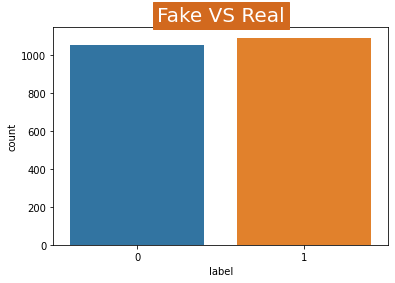

In [ ]:

chart=sns.countplot(x='label',data=df)#,palette="coolwarm")
plt.title("Fake VS Real",
          fontsize='20',
          backgroundcolor='chocolate',
          color='white');

In [4]:
def remove_null_values(df):
    return df.dropna(how='any',axis=0)

In [5]:
df1 = df[df.isna().any(axis=1)]
df = remove_null_values(df)
print("Total rows dropped because of NaN values:", len(df1))
print("Total rows to be used in the analysis:", len(df))

train_data, test_data= train_test_split(df, test_size=0.2, random_state=1)
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=1) # 0.25 x 0.8 = 0.2

y_train = train_data['label'].to_numpy()
y_test = test_data['label'].to_numpy()
y_val = val_data['label'].to_numpy()

print(train_data.shape)
print(test_data.shape)
print(val_data.shape)
print(train_data.head())

print(y_train.shape)
print(y_test.shape)
print(y_val.shape)
print(y_train[:10])


Total rows dropped because of NaN values: 15
Total rows to be used in the analysis: 2149
(1375, 4)
(430, 4)
(344, 4)
       Unnamed: 0                                              title  \
1069         1069  Indian princess watches over rare paleontologi...   
32565       32565  Trump ally Stone to testify to House panel pro...   
51015       51015  RADICAL “OCCUPY” MOM WHO LEFT 4 KIDS AND HUSBA...   
29395       29395   WATCH: Chuck Todd Reveals More Evidence Trump...   
57759       57759  JOY BEHAR Still Claims Clinton Won…BUT Wore Bi...   

                                                    text  label  
1069   Indian princess watches over rare paleontologi...      1  
32565  WASHINGTON (Reuters) - Roger Stone, a longtime...      0  
51015  Occupy Wall Street 2011:The fun is over for a ...      1  
29395  On Sunday, Meet the Press host Chuck Todd reve...      1  
57759  The View s Joy Behar just let everyone know th...      1  
(1375,)
(430,)
(344,)
[1 0 1 1 1 1 1 0 0 1]


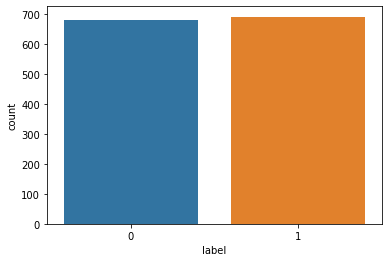

In [ ]:
chart=sns.countplot(x='label',data=train_data)#,palette="coolwarm")
# chart.set(xlabel='common xlabel', ylabel='common ylabel')
# plt.show()
# plt.title("Fake VS Real",
#           fontsize='20',
#           backgroundcolor='chocolate',
#           color='white');


In [6]:
stopwords = set(ENGLISH_STOP_WORDS)

class LemmaTokenizer(object):

    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc) if t not in ENGLISH_STOP_WORDS]

In [7]:
stopwords = set(ENGLISH_STOP_WORDS)

class LemmaTokenizer(object):

    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc) if t not in ENGLISH_STOP_WORDS]

In [8]:
import re
import nltk
from nltk.corpus import stopwords
#from gensim.parsing.preprocessing import STOPWORDS
import textblob
def data_cleaning(data):

    data = re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", data)
    data = re.sub('[\W_]+', " ",data)
    data=  re.sub('[0-9]+', " ",data)
    data=data.lower()

    data = nltk.word_tokenize(data)

    stopwords_nltk = set(stopwords.words('english'))
    stopwords_sklearn = set(ENGLISH_STOP_WORDS)
    #stopwords_gensim = set(STOPWORDS)
    #stopwords_textblob = textblob.stopwords.words('english')

    combined_stopwords = stopwords_nltk.union(stopwords_sklearn)#.union(stopwords_gensim)#.union(stopwords_textblob)

    data = [word for word in data if word not in combined_stopwords]

    lemmatizer = WordNetLemmatizer()
    data = [lemmatizer.lemmatize(word) for word in data]

    # for word in data:
    #     if(len(word)<=2):
    #         print(word)
    data = [word for word in data if len(word)>1]

    data = " ".join(data)

    #na doume gia stemming!!!
    # snowball_stemmer = SnowballStemmer("english")
    # data = [snowball_stemmer.stem(word) for word in data]
    # porter_stemmer = nltk.stem.PorterStemmer()
    # data = [porter_stemmer.stem(word) for word in data]
    #
    return data


In [9]:
def vectorize_data(train_data, val_data, test_data, ngram_range = (1,1), min_df = 5, max_df = 0.4,vectorize_type = 0, data_type = 0):
    if(vectorize_type == 0):
        vectorizer = CountVectorizer(analyzer='word', ngram_range=ngram_range, min_df = min_df, max_df = max_df)
    else:
        vectorizer = TfidfVectorizer(analyzer='word', ngram_range=ngram_range, min_df = min_df, max_df = max_df)

    train_vectorizer = vectorizer.fit_transform(train_data)
    val_vectorizer = vectorizer.transform(val_data)
    test_vectorizer = vectorizer.transform(test_data)

    return train_vectorizer, val_vectorizer, test_vectorizer


In [10]:
def data_preprocessing(df):
    #exei null values sto titles

    # df1 = df[df.isna().any(axis=1)]
    # df = remove_null_values(df)

    df['Full_Text'] = df[['title', 'text']].apply(' '.join, axis=1)
    df['Clean_Full_Text'] = df['Full_Text'].apply(data_cleaning)
    print(df['Clean_Full_Text'])


    #print("Total rows dropped because of NaN values:", len(df1))
    return df

In [11]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [12]:
train_data = data_preprocessing(train_data)
test_data = data_preprocessing(test_data)
val_data= data_preprocessing(val_data)

print(train_data.head())
print(test_data.head())
print(val_data.head())

1069     indian princess watch rare paleontological rem...
32565    trump ally stone testify house panel probing e...
51015    radical occupy mom left kid husband block nyc ...
29395    watch chuck todd reveals evidence trump campai...
57759    joy behar claim clinton wore bizarre mourning ...
                               ...                        
56398    britain vassal state say french presidential h...
66983    obama france hollande meet washington thursday...
48329    britain eu agree divorce northern ireland citi...
60603    как великобритания использует миротворчество д...
56013    secret ledger ukraine list cash donald trump c...
Name: Clean_Full_Text, Length: 1375, dtype: object
58847    welcome america refugee food stamp strikingly ...
62938    florida insurer share tumble hurricane irma lo...
32127    chinese official optimistic trade amid trump u...
37155    senate republican express optimism healthcare ...
34410    medium silent president trump make american tr...
     

In [ ]:

train_count_vec, val_count_vec, test_count_vec = vectorize_data(train_data['Clean_Full_Text'], val_data['Clean_Full_Text'], test_data['Clean_Full_Text'], ngram_range = (1,1), min_df = 10, max_df = 0.4, vectorize_type=0)
train_tfidf_vec, val_tfidf_vec, test_tfidf_vec = vectorize_data(train_data['Clean_Full_Text'], val_data['Clean_Full_Text'], test_data['Clean_Full_Text'], ngram_range = (1,1),  min_df = 10, max_df = 0.4,vectorize_type=1)


train_count_vec_bigrams, val_count_vec_bigrams, test_count_vec_bigrams = vectorize_data(train_data['Clean_Full_Text'], val_data['Clean_Full_Text'], test_data['Clean_Full_Text'], ngram_range = (2,2), min_df = 5, max_df = 0.3, vectorize_type=0)
train_tfidf_vec_bigrams, val_tfidf_vec_bigrams, test_tfidf_vec_bigrams = vectorize_data(train_data['Clean_Full_Text'], val_data['Clean_Full_Text'], test_data['Clean_Full_Text'], ngram_range = (2,2),  min_df = 5, max_df = 0.3,vectorize_type=1)

print(train_count_vec.shape)
print(val_count_vec.shape)
print(test_count_vec.shape)

print(train_tfidf_vec.shape)
print(val_tfidf_vec.shape)
print(test_tfidf_vec.shape)

# return count_vectorized_data
# df['CountVectorizer'] = df['Full_Text'].apply(vectorize_data, args =(0,))
# df['TfidfVectorizer'] = df['Full_Text'].apply(vectorize_data, args =(1,))


(1372, 4522)
(344, 4522)
(429, 4522)
(1372, 4522)
(344, 4522)
(429, 4522)


In [13]:
def create_wordcloud(text):

    stop_words = set(STOPWORDS)
    stop_words.update(ENGLISH_STOP_WORDS)
    custom_stop_words=['said','told','look','saying']
    stop_words.update(custom_stop_words)

    text = text.values.tolist()
    print(text[:5])
    for i in range(len(text)):
        text[i] = text[i].lower()

    # Create and generate a word cloud image:
    cloud = WordCloud(background_color = 'black', mode = 'RGB', stopwords = stop_words, width = 1920, height = 1080, collocations = False)
    wordcloud = cloud.generate(' '.join(text))

    plt.figure(figsize = (19,10), facecolor = None)
    plt.title('lol')
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout(pad=0)

['video love winston smith let truth told undoubtedly living age universal deceit government corporation colluding bury truth promote state sanctioned narrative party told reject evidence eye ear final essential command heart sank thought enormous power arrayed ease party intellectual overthrow debate subtle argument able understand answer right wrong right george orwell describing plight winston smith literary classic youtube artist rebekah johnson say propaganda puppet lying public suppressing truth agenda listen song watch video read propaganda news st century wire propaganda filessupport wire subscribe member wire tv', 'young man sponsored cair invited white house hard know obama hate america israel police officer barry time attend funeral cop murdered race war got time meet cair sponsored victim alleged police brutality following violent protest supposedly hand israel police officer got time victim especially radical muslim organization cair using victim status promote radical cau

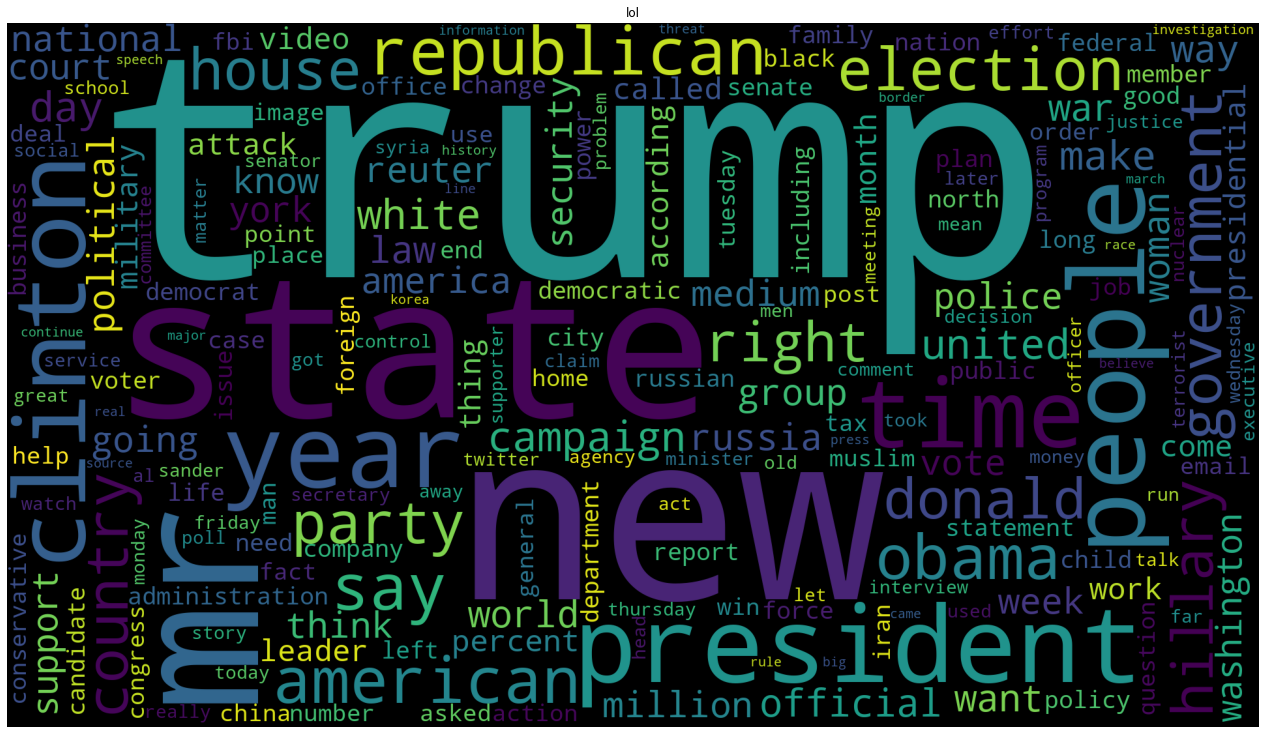

In [ ]:
#mhpws xreiastei wordcloud xexwrista fgia title kai text
create_wordcloud(train_data['Clean_Full_Text'])

['trump ally stone testify house panel probing election meddling washington reuters roger stone longtime ally president donald trump said thursday agreed testify closed hearing house representative intelligence committee investigation possible russia meddling presidential election member committee present hearing stone informal adviser republican president said statement hearing held sept stone said asked open public hearing transparency closed requested immediate release transcript avoid confusion testimony look forward testifying anxious correct number misstatement committee member regarding activity stone said spokeswoman representative mike conaway republican charge committee investigation declined comment house panel main congressional committee investigating allegation russia sought interfere election probing trump associate colluded moscow russia denies effort trump dismissed talk collusion medium report earlier year said stone trump associate communication financial transaction

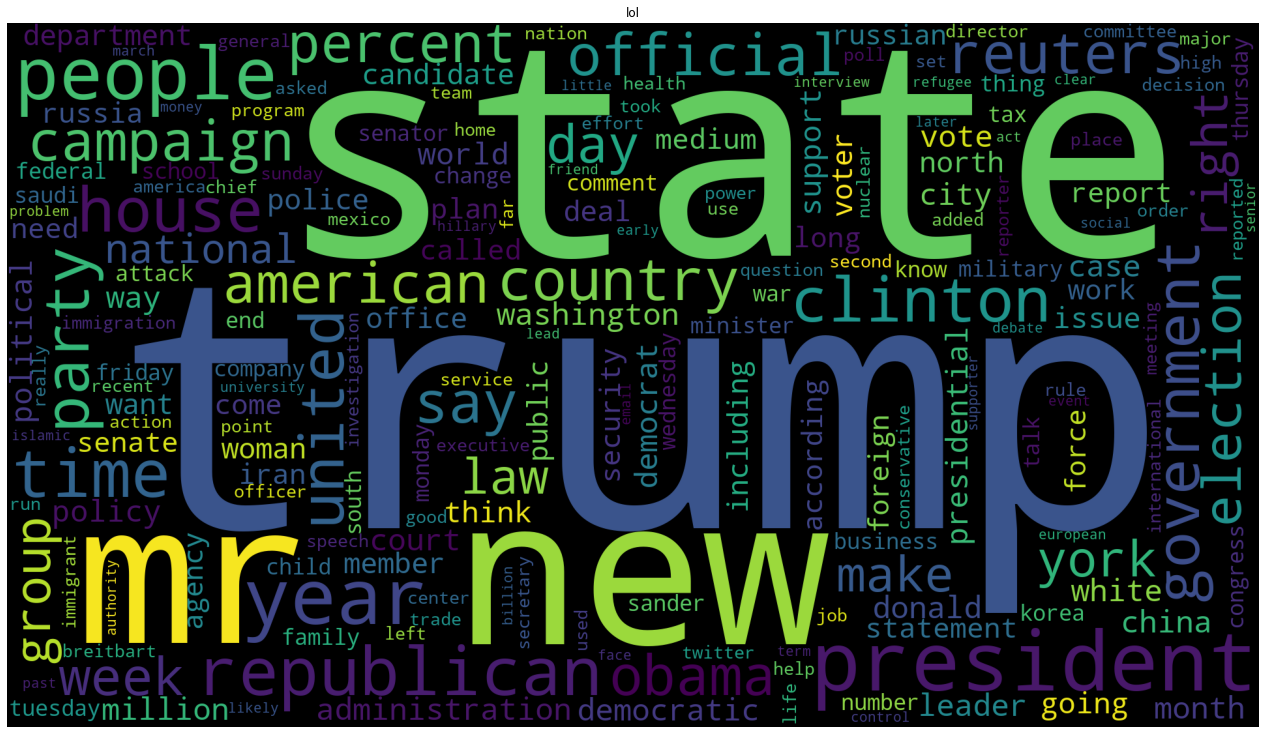

In [14]:

create_wordcloud(train_data.loc[train_data['label'] == 0]['Clean_Full_Text'])


['indian princess watch rare paleontological remains indian princess watch rare paleontological remains thu oct news bulletin picture taken september show dinosaur princess aaliya sultana babi holding fossilised dinosaur egg palace balasinor afp member indian royal family leading excavation area nicknamed india jurassic park aaliya sultana babi princess birth dubbed dinosaur princess love archeology babi passion started accepted decide group foreign geologist site balasinor princely state site dinosaur park welcome large number visitor year aaliya pushing authority better preservation thousand egg bone buried area belief coordination government department win unesco geo park status site tourist enjoy luxurious stay aaliya family palace personal collection visiting park loading', 'radical occupy mom left kid husband block nyc traffic play victim card sue police brutality occupy wall street fun hippie mother left husband child travel mile join occupy wall street protest stacey hessler sw

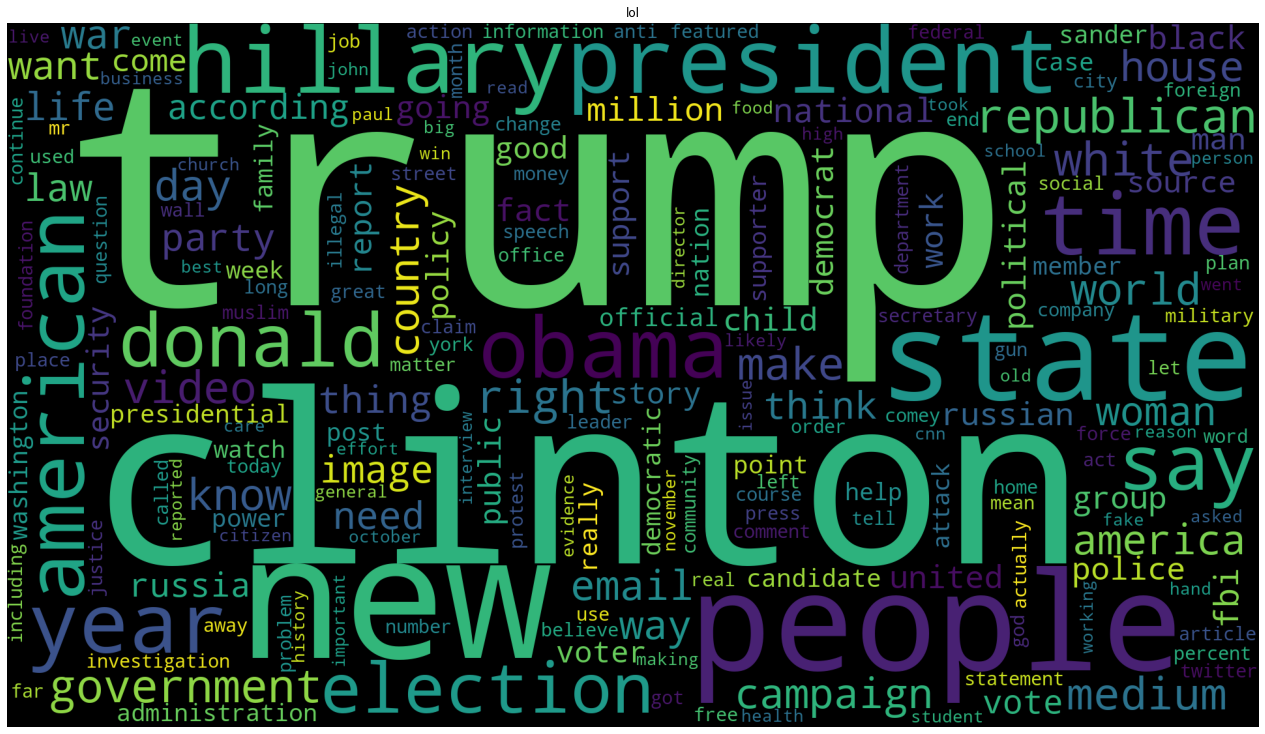

In [15]:
create_wordcloud(train_data.loc[train_data['label'] == 1]['Clean_Full_Text'])




In [ ]:
import gensim
from gensim.models import Word2Vec
num_features = 150 # the dimensionality of the feature vectors
min_word_count = 1 # minimum word count to consider when training the model
num_workers = 4 # number of threads to use while training
context = 5 # size of the context window
downsampling = 1e-3 # downsampling frequency for frequent words

# Train the Word2Vec model
word2vec_model = Word2Vec( size=num_features,
                 window=context,
                 min_count=min_word_count,
                 workers=num_workers,
                 sample=downsampling)
word2vec_model.build_vocab(train_data['Clean_Full_Text'].apply(lambda x: x.split()))
#model.train(train_data['Clean_Full_Text'])
word2vec_model.train(train_data['Clean_Full_Text'].apply(lambda x: x.split()), total_examples=word2vec_model.corpus_count, epochs=word2vec_model.iter)

# Save the trained model
word2vec_model.save("word2vec.model")

#embedding = model.wv[sentence]
word2vec_model.most_similar("people")

# Use the embedding as input features for a classifier
#classifier.predict(embedding)

C:\Users\Windows\AppData\Local\Temp\ipykernel_4532\302942084.py:17: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  word2vec_model.train(train_data['Clean_Full_Text'].apply(lambda x: x.split()), total_examples=word2vec_model.corpus_count, epochs=word2vec_model.iter)
C:\Users\Windows\AppData\Local\Temp\ipykernel_4532\302942084.py:23: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  word2vec_model.most_similar("people")


[('right', 0.9798369407653809),
 ('life', 0.9763911366462708),
 ('like', 0.9706711173057556),
 ('cellar', 0.967359185218811),
 ('woman', 0.9667559266090393),
 ('american', 0.9654332399368286),
 ('thankful', 0.9613805413246155),
 ('way', 0.9612995386123657),
 ('nincompoop', 0.9606902599334717),
 ('terrific', 0.9592779874801636)]

In [ ]:
word2vec_model = Word2Vec.load('word2vec.model')


# Convert each sentence in the train set to a vector
train_word2vec = np.array([np.mean([word2vec_model.wv[token] for token in sentence.split() if token in word2vec_model.wv]
                        or [np.zeros(num_features)], axis=0) for sentence in train_data['Clean_Full_Text']])

# Convert each sentence in the test set to a vector
test_word2vec = np.array([np.mean([word2vec_model.wv[token] for token in sentence.split() if token in word2vec_model.wv]
                        or [np.zeros(num_features)], axis=0) for sentence in test_data['Clean_Full_Text']])


In [ ]:
train_scores = []
test_scores = []
preds=[]
#CV=[]

def results(model, x_train, y_train, x_test, y_test):
    
    
    # Training model
    model.fit(x_train,y_train)

    # score of train set
    train_score = model.score(x_train,y_train)
    print(train_score)
    train_scores.append(round(train_score,2))
    y_pred_train=model.predict(x_train)

    # score of test set
    test_score = model.score(x_test,y_test)
    print(test_score)
    test_scores.append(round(test_score,2))
    y_pred_test=model.predict(x_test)
    preds.append(y_pred_test)

    # train set using Cross validation
    #cross_val = cross_val_score(model ,x_train ,y_train ,cv=10) <--- to speed things up
    #cv_mean = cross_val.mean()
    #CV.append(round(cv_mean,2))

    # Printing results
    print("Train score :",round(train_score,2))
    print("Test score :",round(test_score,2))
    #print("Train CV scores :",cross_val)
    #print("Train Cross Validation mean :",round(cv_mean,2))

    df_model = pd.DataFrame(classification_report(y_pred_test,y_test, digits=2,output_dict=True)).T
    display(df_model)   



In [ ]:
########## before gridsearch

In [ ]:
# gnb=GaussianNB()
# results(gnb, train_count_vec.toarray(), y_train, test_count_vec.toarray(), y_test)
#

In [ ]:
# knn=KNeighborsClassifier()
# results(knn, train_count_vec.toarray(), y_train, test_count_vec.toarray(), y_test)
#

In [ ]:
# lr=LogisticRegression()
# results(lr, train_count_vec.toarray(), y_train, test_count_vec.toarray(), y_test)
#

In [ ]:
# mlp=MLPClassifier()
# results(mlp, train_count_vec.toarray(), y_train, test_count_vec.toarray(), y_test)
#

In [ ]:
# svm=SVC()
# results(svm, train_count_vec.toarray(), y_train, test_count_vec.toarray(), y_test)
#

In [ ]:
# rf=RandomForestClassifier()
# results(rf, train_count_vec.toarray(), y_train, test_count_vec.toarray(), y_test)
#

In [ ]:
# xgb=xgb.XGBClassifier(objective="binary:logistic", random_state=42)
# results(xgb, train_count_vec.toarray(), y_train, test_count_vec.toarray(), y_test)

In [ ]:
# barWidth = 0.5
# fig = plt.subplots(figsize =(10, 5))
# br1 = np.arange(len(train_scores))
#
# plt.bar(br1, test_scores, color ='steelblue', width = barWidth,edgecolor ='grey', label ='test_score')
#
# plt.xlabel('classifier', fontweight ='bold', fontsize = 15)
# plt.ylabel('test scores', fontweight ='bold', fontsize = 15)
# plt.xticks([r for r in range(len(test_scores))],['GNB', 'kNN', 'LR', 'MLP','SVM','RF','xgb'])
#
# plt.show()

In [ ]:
################### pipelines- gridsearch for better results

In [ ]:
from imblearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV

In [ ]:
print(train_count_vec.toarray().var(axis=0).min(), train_count_vec.toarray().var(axis=0).max())

0.007235505614157392 42.391840878376144


In [ ]:
len(train_count_vec.toarray())

1372

In [ ]:
train_count_vec = train_count_vec.toarray()
train_tfidf_vec = train_tfidf_vec.toarray()

test_count_vec = test_count_vec.toarray()
test_tfidf_vec= test_tfidf_vec.toarray()


train_count_vec_bigrams = train_count_vec_bigrams.toarray()
train_tfidf_vec_bigrams = train_tfidf_vec_bigrams.toarray()

test_count_vec_bigrams = test_count_vec_bigrams.toarray()
test_tfidf_vec_bigrams = test_tfidf_vec_bigrams.toarray()


In [ ]:

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
def all_results(estimator, X_train, X_test):
    estimator.fit(X_train, y_train)
    print(estimator.best_estimator_)
    print(estimator.best_params_)
    print(estimator.best_score_)
    print('-------------------------')
    results(estimator, X_train, y_train, X_test, y_test)
    print('-------------------------')



    #test_score = estimator.score(X_test,y_test)
    #test_scores.append(round(test_score,2))
    #print("Test score :",round(test_score,2))


In [ ]:
def plots(preds):
  vectorizers=['Count Vectorizer - Unigrams','TF-IDF Vectorizer - Unigrams','Word2vec','Count Vectorizer - Bigrams','TF-IDF Vectorizer - Bigrams']
  f, axes = plt.subplots(1, 5, figsize=(20, 5), sharey='row')

  for i in range(len(vectorizers)):
    y_pred = preds[i]
    cf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cf_matrix)
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.set_title(vectorizers[i])
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')

  f.text(0.4, 0.1, 'Predicted label', ha='left')
  plt.subplots_adjust(wspace=0.40, hspace=0.1)

  f.colorbar(disp.im_, ax=axes)
  plt.show()
  print('-------------------------')


In [ ]:
def t_scores(test_scores):
  barWidth = 0.5
  fig = plt.subplots(figsize =(10, 5))
  br1 = np.arange(len(train_scores))

  plt.bar(br1, test_scores, color ='steelblue', width = barWidth,edgecolor ='grey', label ='test_score')

  plt.xlabel('Feature Vector', fontweight ='bold', fontsize = 15)
  plt.ylabel('Test Scores', fontweight ='bold', fontsize = 15)
  plt.xticks([r for r in range(len(test_scores))],['Count Vectorizer - Unigrams','TF-IDF Vectorizer - Unigrams','Word2vec','Count Vectorizer - Bigrams','Count Vectorizer - Bigrams'])
  plt.xticks(rotation=45)
  plt.show()

Pipeline(memory='tmp',
         steps=[('scaler', MinMaxScaler()),
                ('gnb', GaussianNB(var_smoothing=0.001))])
{'gnb__var_smoothing': 0.001}
0.7648700382993461
-------------------------
0.948931735278791
0.8038878488397405
Train score : 0.95
Test score : 0.8
-------------------------
Pipeline(memory='tmp',
         steps=[('scaler', MinMaxScaler()),
                ('gnb', GaussianNB(var_smoothing=1e-06))])
{'gnb__var_smoothing': 1e-06}
0.7722885739070394
-------------------------
0.9832346464139325
0.8083068137233533
Train score : 0.98
Test score : 0.81
-------------------------
Pipeline(memory='tmp',
         steps=[('scaler', MinMaxScaler()),
                ('gnb', GaussianNB(var_smoothing=0.001))])
{'gnb__var_smoothing': 0.001}
0.7188148357301193
-------------------------
0.723299137163845
0.7385171317863207
Train score : 0.72
Test score : 0.74
-------------------------
Pipeline(memory='tmp',
         steps=[('scaler', MinMaxScaler()),
                ('gnb', Gaussi

,precision,recall,f1-score,support
0,0.807882,0.784689,0.796117,209.000000
1,0.800885,0.822727,0.811659,220.000000
accuracy,0.804196,0.804196,0.804196,0.804196
macro avg,0.804383,0.803708,0.803888,429.000000
weighted avg,0.804294,0.804196,0.804087,429.000000


,precision,recall,f1-score,support
0,0.798030,0.798030,0.798030,203.000000
1,0.818584,0.818584,0.818584,226.000000
accuracy,0.808858,0.808858,0.808858,0.808858
macro avg,0.808307,0.808307,0.808307,429.000000
weighted avg,0.808858,0.808858,0.808858,429.000000


,precision,recall,f1-score,support
0,0.738916,0.717703,0.728155,209.000000
1,0.738938,0.759091,0.748879,220.000000
accuracy,0.738928,0.738928,0.738928,0.738928
macro avg,0.738927,0.738397,0.738517,429.000000
weighted avg,0.738927,0.738928,0.738783,429.000000


,precision,recall,f1-score,support
0,0.748768,0.830601,0.787565,183.000000
1,0.862832,0.792683,0.826271,246.000000
accuracy,0.808858,0.808858,0.808858,0.808858
macro avg,0.805800,0.811642,0.806918,429.000000
weighted avg,0.814175,0.808858,0.809760,429.000000


,precision,recall,f1-score,support
0,0.852217,0.706122,0.772321,245.000000
1,0.681416,0.836957,0.751220,184.000000
accuracy,0.762238,0.762238,0.762238,0.762238
macro avg,0.766816,0.771539,0.761770,429.000000
weighted avg,0.778960,0.762238,0.763271,429.000000


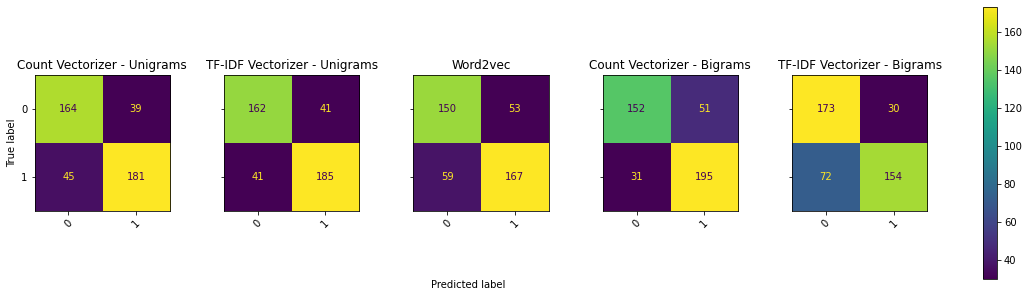

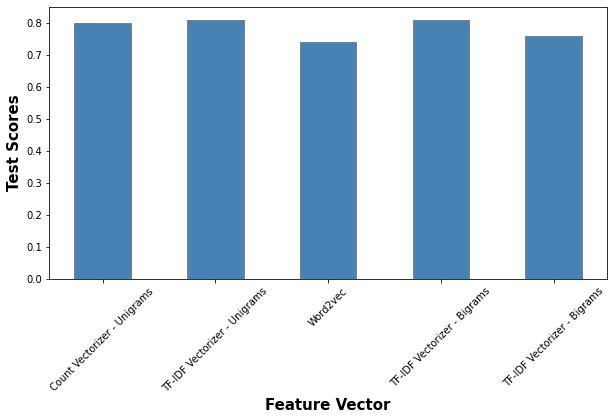

In [ ]:
from sklearn.preprocessing import MinMaxScaler
#selector = VarianceThreshold()
scaler = MinMaxScaler()
clf = GaussianNB()

pipe = Pipeline(steps=[ ('scaler', scaler), ('gnb', clf)], memory = 'tmp')

vthreshold = [0.0, 0.01, 0.02, 0.05, 0.1, 0.2]#vars
var_smooth=[1e-2,1e-3,1e-4,1e-5,1e-6] # var_smoothing for gnb
estimator = GridSearchCV(pipe, dict(gnb__var_smoothing=var_smooth), cv=5, scoring='f1_macro', n_jobs=-1)

train_scores = []
test_scores = []
preds=[]

all_results(estimator, train_count_vec, test_count_vec)

all_results(estimator, train_tfidf_vec, test_tfidf_vec)
all_results(estimator, train_word2vec, test_word2vec)

all_results(estimator, train_count_vec_bigrams, test_count_vec_bigrams)
all_results(estimator, train_tfidf_vec_bigrams, test_tfidf_vec_bigrams)

plots(preds)

t_scores(test_scores)

Pipeline(memory='tmp',
         steps=[('scaler', MinMaxScaler()),
                ('kNN',
                 KNeighborsClassifier(algorithm='ball_tree', n_jobs=-1,
                                      n_neighbors=1))])
{'kNN__algorithm': 'ball_tree', 'kNN__n_neighbors': 1}
0.5803382539130502
-------------------------
1.0
0.5447128924198856
Train score : 1.0
Test score : 0.54
-------------------------
Pipeline(memory='tmp',
         steps=[('scaler', MinMaxScaler()),
                ('kNN',
                 KNeighborsClassifier(algorithm='ball_tree', n_jobs=-1,
                                      n_neighbors=1))])
{'kNN__algorithm': 'ball_tree', 'kNN__n_neighbors': 1}
0.351599021922312
-------------------------
1.0
0.3450381679389313
Train score : 1.0
Test score : 0.35
-------------------------
Pipeline(memory='tmp',
         steps=[('scaler', MinMaxScaler()),
                ('kNN',
                 KNeighborsClassifier(algorithm='ball_tree', n_jobs=-1,
                              

,precision,recall,f1-score,support
0,0.310345,0.617647,0.413115,102.000000
1,0.827434,0.571865,0.676311,327.000000
accuracy,0.582751,0.582751,0.582751,0.582751
macro avg,0.568889,0.594756,0.544713,429.000000
weighted avg,0.704489,0.582751,0.613733,429.000000


C:\Users\Windows\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Windows\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Windows\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

,precision,recall,f1-score,support
0,0.000000,0.000000,0.000000,0.000000
1,1.000000,0.526807,0.690076,429.000000
accuracy,0.526807,0.526807,0.526807,0.526807
macro avg,0.500000,0.263403,0.345038,429.000000
weighted avg,1.000000,0.526807,0.690076,429.000000


,precision,recall,f1-score,support
0,0.837438,0.755556,0.794393,225.000000
1,0.756637,0.838235,0.795349,204.000000
accuracy,0.794872,0.794872,0.794872,0.794872
macro avg,0.797038,0.796895,0.794871,429.000000
weighted avg,0.799015,0.794872,0.794847,429.000000


,precision,recall,f1-score,support
0,0.453202,0.686567,0.545994,134.000000
1,0.814159,0.623729,0.706334,295.000000
accuracy,0.643357,0.643357,0.643357,0.643357
macro avg,0.633681,0.655148,0.626164,429.000000
weighted avg,0.701413,0.643357,0.656251,429.000000


,precision,recall,f1-score,support
0,0.211823,0.417476,0.281046,103.000000
1,0.734513,0.509202,0.601449,326.000000
accuracy,0.487179,0.487179,0.487179,0.487179
macro avg,0.473168,0.463339,0.441248,429.000000
weighted avg,0.609019,0.487179,0.524523,429.000000


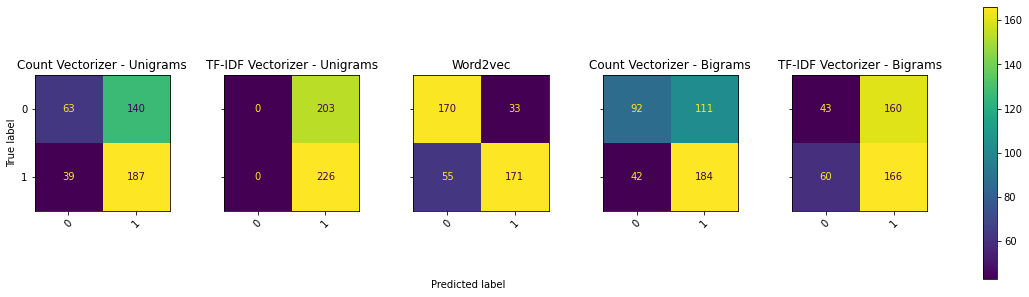

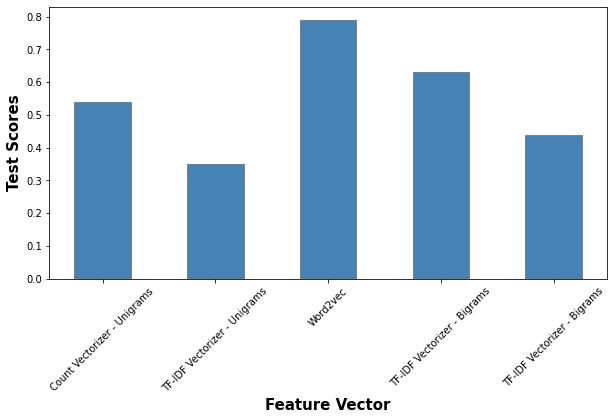

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#selector = VarianceThreshold()
clf = neighbors.KNeighborsClassifier(n_jobs=-1)

pipe = Pipeline(steps=[('scaler', scaler), ('kNN', clf)], memory = 'tmp')

vthreshold = [0.0, 0.01, 0.02, 0.05, 0.1, 0.2]#vars
k = [1, 3, 5, 7, 9] # neighbours
knn_algorithm = ['ball_tree', 'kd_tree']
estimator = GridSearchCV(pipe, dict(kNN__n_neighbors=k, kNN__algorithm=knn_algorithm), cv=5, scoring='f1_macro', n_jobs=-1)

train_scores = []
test_scores = []
preds=[]

all_results(estimator, train_count_vec, test_count_vec)
all_results(estimator, train_tfidf_vec, test_tfidf_vec)
all_results(estimator, train_word2vec, test_word2vec)

all_results(estimator, train_count_vec_bigrams, test_count_vec_bigrams)
all_results(estimator, train_tfidf_vec_bigrams, test_tfidf_vec_bigrams)

plots(preds)

t_scores(test_scores)

C:\Users\Windows\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Windows\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Windows\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Windows\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


Pipeline(memory='tmp',
         steps=[('scaler', MinMaxScaler()),
                ('LR', LogisticRegression(C=2.0, n_jobs=-1, solver='saga'))])
{'LR__C': 2.0, 'LR__solver': 'saga'}
0.880391256571493
-------------------------
0.9883357137999047
0.8761311200335591
Train score : 0.99
Test score : 0.88
-------------------------
Pipeline(memory='tmp',
         steps=[('scaler', MinMaxScaler()),
                ('LR', LogisticRegression(n_jobs=-1, solver='newton-cg'))])
{'LR__C': 1.0, 'LR__solver': 'newton-cg'}
0.8825639848001134
-------------------------
1.0
0.8829863838701231
Train score : 1.0
Test score : 0.88
-------------------------
Pipeline(memory='tmp',
         steps=[('scaler', MinMaxScaler()),
                ('LR',
                 LogisticRegression(C=2.0, n_jobs=-1, solver='newton-cg'))])
{'LR__C': 2.0, 'LR__solver': 'newton-cg'}
0.8009507276711926
-------------------------
0.8097585776572634
0.804066985645933
Train score : 0.81
Test score : 0.8
-------------------------
Pipel

,precision,recall,f1-score,support
0,0.871921,0.867647,0.869779,204.000000
1,0.880531,0.884444,0.882483,225.000000
accuracy,0.876457,0.876457,0.876457,0.876457
macro avg,0.876226,0.876046,0.876131,429.000000
weighted avg,0.876437,0.876457,0.876442,429.000000


,precision,recall,f1-score,support
0,0.866995,0.884422,0.875622,199.00000
1,0.898230,0.882609,0.890351,230.00000
accuracy,0.883450,0.883450,0.883450,0.88345
macro avg,0.882613,0.883515,0.882986,429.00000
weighted avg,0.883741,0.883450,0.883519,429.00000


,precision,recall,f1-score,support
0,0.822660,0.776744,0.799043,215.000000
1,0.787611,0.831776,0.809091,214.000000
accuracy,0.804196,0.804196,0.804196,0.804196
macro avg,0.805135,0.804260,0.804067,429.000000
weighted avg,0.805176,0.804196,0.804055,429.000000


,precision,recall,f1-score,support
0,0.802956,0.895604,0.846753,182.000000
1,0.915929,0.838057,0.875264,247.000000
accuracy,0.862471,0.862471,0.862471,0.862471
macro avg,0.859442,0.866831,0.861009,429.000000
weighted avg,0.868001,0.862471,0.863169,429.000000


,precision,recall,f1-score,support
0,0.847291,0.873096,0.860000,197.000000
1,0.889381,0.866379,0.877729,232.000000
accuracy,0.869464,0.869464,0.869464,0.869464
macro avg,0.868336,0.869738,0.868865,429.000000
weighted avg,0.870053,0.869464,0.869588,429.000000


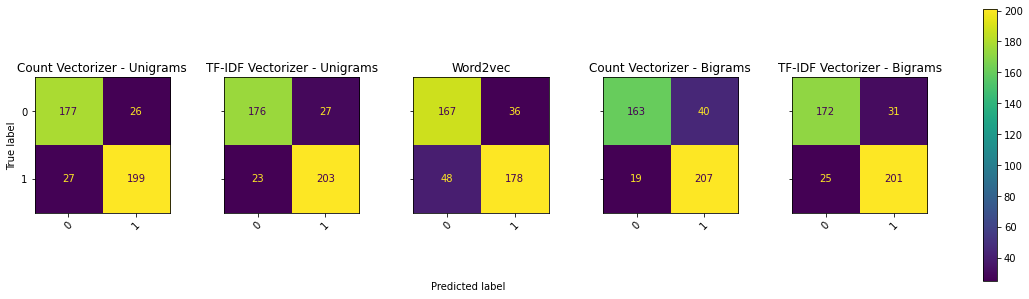

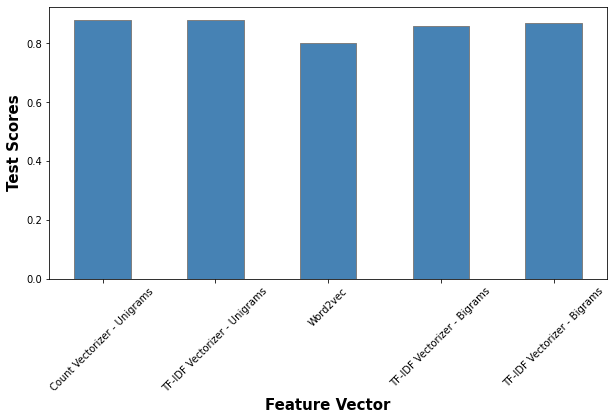

In [ ]:
scaler = MinMaxScaler()
clf = LogisticRegression(n_jobs=-1)

pipe = Pipeline(steps=[('scaler', scaler), ('LR', clf)], memory = 'tmp')

solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
logistic_C = [0.1, 0.5, 1.0, 2.0]
estimator = GridSearchCV(pipe, dict(LR__solver=solver, LR__C=logistic_C), cv=5, scoring='f1_macro', n_jobs=-1)

train_scores = []
test_scores = []
preds=[]

all_results(estimator, train_count_vec, test_count_vec)
all_results(estimator, train_tfidf_vec, test_tfidf_vec)
all_results(estimator, train_word2vec, test_word2vec)

all_results(estimator, train_count_vec_bigrams, test_count_vec_bigrams)
all_results(estimator, train_tfidf_vec_bigrams, test_tfidf_vec_bigrams)

plots(preds)

t_scores(test_scores)

Pipeline(memory='tmp',
         steps=[('scaler', MinMaxScaler()),
                ('mlp',
                 MLPClassifier(hidden_layer_sizes=(100, 100), solver='lbfgs'))])
{'mlp__activation': 'relu', 'mlp__hidden_layer_sizes': (100, 100), 'mlp__solver': 'lbfgs'}
0.8715161299713923
-------------------------
1.0
0.8690875801037534
Train score : 1.0
Test score : 0.87
-------------------------
Pipeline(memory='tmp',
         steps=[('scaler', MinMaxScaler()),
                ('mlp',
                 MLPClassifier(activation='tanh',
                               hidden_layer_sizes=(100, 100, 100),
                               solver='lbfgs'))])
{'mlp__activation': 'tanh', 'mlp__hidden_layer_sizes': (100, 100, 100), 'mlp__solver': 'lbfgs'}
0.8782205375305396
-------------------------
1.0
0.8623960943998348
Train score : 1.0
Test score : 0.86
-------------------------
Pipeline(memory='tmp',
         steps=[('scaler', MinMaxScaler()),
                ('mlp',
                 MLPClassifier(a

,precision,recall,f1-score,support
0,0.862069,0.862069,0.862069,203.000000
1,0.876106,0.876106,0.876106,226.000000
accuracy,0.869464,0.869464,0.869464,0.869464
macro avg,0.869088,0.869088,0.869088,429.000000
weighted avg,0.869464,0.869464,0.869464,429.000000


,precision,recall,f1-score,support
0,0.886700,0.833333,0.859189,216.000000
1,0.840708,0.892019,0.865604,213.000000
accuracy,0.862471,0.862471,0.862471,0.862471
macro avg,0.863704,0.862676,0.862396,429.000000
weighted avg,0.863865,0.862471,0.862374,429.000000


C:\Users\Windows\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Windows\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


,precision,recall,f1-score,support
0,0.871921,0.842857,0.857143,210.000000
1,0.853982,0.881279,0.867416,219.000000
accuracy,0.862471,0.862471,0.862471,0.862471
macro avg,0.862952,0.862068,0.862279,429.000000
weighted avg,0.862764,0.862471,0.862387,429.000000


,precision,recall,f1-score,support
0,0.871921,0.815668,0.842857,217.000000
1,0.823009,0.877358,0.849315,212.000000
accuracy,0.846154,0.846154,0.846154,0.846154
macro avg,0.847465,0.846513,0.846086,429.000000
weighted avg,0.847750,0.846154,0.846048,429.000000


,precision,recall,f1-score,support
0,0.896552,0.805310,0.848485,226.000000
1,0.805310,0.896552,0.848485,203.000000
accuracy,0.848485,0.848485,0.848485,0.848485
macro avg,0.850931,0.850931,0.848485,429.000000
weighted avg,0.853377,0.848485,0.848485,429.000000


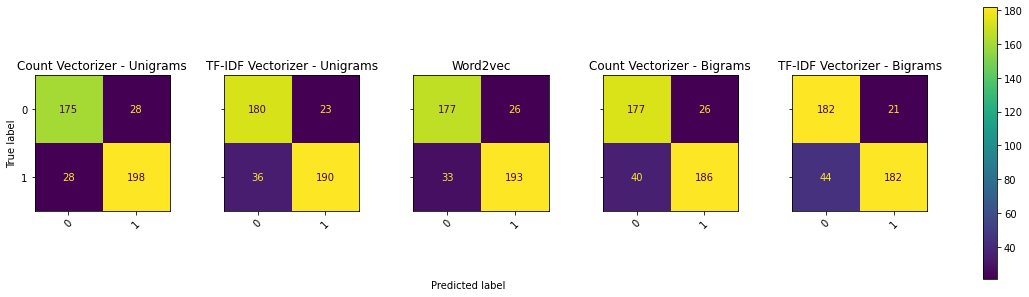

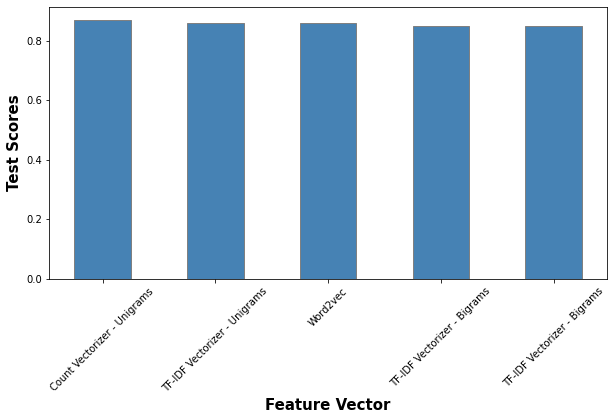

In [ ]:
scaler = MinMaxScaler()
selector = VarianceThreshold()
clf=MLPClassifier()

pipe = Pipeline(steps=[('scaler', scaler), ('mlp', clf)], memory = 'tmp')
solver = ['lbfgs', 'sgd', 'adam']
activation = ['logistic', 'tanh', 'relu']
hidden_layer_size = [(100,100), (100,100,100,)]

estimator = GridSearchCV(pipe, dict(mlp__solver=solver, mlp__activation = activation,
                                    mlp__hidden_layer_sizes = hidden_layer_size), cv=5, scoring='f1_macro', n_jobs=-1)
train_scores = []
test_scores = []
preds=[]

all_results(estimator, train_count_vec, test_count_vec)
all_results(estimator, train_tfidf_vec, test_tfidf_vec)
all_results(estimator, train_word2vec, test_word2vec)

all_results(estimator, train_count_vec_bigrams, test_count_vec_bigrams)
all_results(estimator, train_tfidf_vec_bigrams, test_tfidf_vec_bigrams)

plots(preds)

t_scores(test_scores)


Pipeline(memory='tmp',
         steps=[('scaler', MinMaxScaler()),
                ('svm', SVC(C=0.5, kernel='sigmoid'))])
{'svm__C': 0.5, 'svm__kernel': 'sigmoid'}
0.8446321987585147
-------------------------
0.9336020408868733
0.8685891825660774
Train score : 0.93
Test score : 0.87
-------------------------
Pipeline(memory='tmp',
         steps=[('scaler', MinMaxScaler()), ('svm', SVC(kernel='sigmoid'))])
{'svm__C': 1.0, 'svm__kernel': 'sigmoid'}
0.8811179368023818
-------------------------
0.979586588022743
0.8806102904663942
Train score : 0.98
Test score : 0.88
-------------------------
Pipeline(memory='tmp',
         steps=[('scaler', MinMaxScaler()), ('svm', SVC(kernel='poly'))])
{'svm__C': 1.0, 'svm__kernel': 'poly'}
0.8497643939675766
-------------------------
0.8906370894373922
0.8618824928924952
Train score : 0.89
Test score : 0.86
-------------------------
Pipeline(memory='tmp',
         steps=[('scaler', MinMaxScaler()),
                ('svm', SVC(C=0.1, kernel='sigmoid'))

,precision,recall,f1-score,support
0,0.832512,0.884817,0.857868,191.000000
1,0.902655,0.857143,0.879310,238.000000
accuracy,0.869464,0.869464,0.869464,0.869464
macro avg,0.867584,0.870980,0.868589,429.000000
weighted avg,0.871426,0.869464,0.869764,429.000000


,precision,recall,f1-score,support
0,0.862069,0.883838,0.872818,198.000000
1,0.898230,0.878788,0.888403,231.000000
accuracy,0.881119,0.881119,0.881119,0.881119
macro avg,0.880150,0.881313,0.880610,429.000000
weighted avg,0.881540,0.881119,0.881210,429.000000


,precision,recall,f1-score,support
0,0.842365,0.863636,0.852868,198.000000
1,0.880531,0.861472,0.870897,231.000000
accuracy,0.862471,0.862471,0.862471,0.862471
macro avg,0.861448,0.862554,0.861882,429.000000
weighted avg,0.862916,0.862471,0.862576,429.000000


,precision,recall,f1-score,support
0,0.871921,0.846890,0.859223,209.000000
1,0.858407,0.881818,0.869955,220.000000
accuracy,0.864802,0.864802,0.864802,0.864802
macro avg,0.865164,0.864354,0.864589,429.000000
weighted avg,0.864991,0.864802,0.864727,429.000000


,precision,recall,f1-score,support
0,0.827586,0.879581,0.852792,191.000000
1,0.898230,0.852941,0.875000,238.000000
accuracy,0.864802,0.864802,0.864802,0.864802
macro avg,0.862908,0.866261,0.863896,429.000000
weighted avg,0.866778,0.864802,0.865112,429.000000


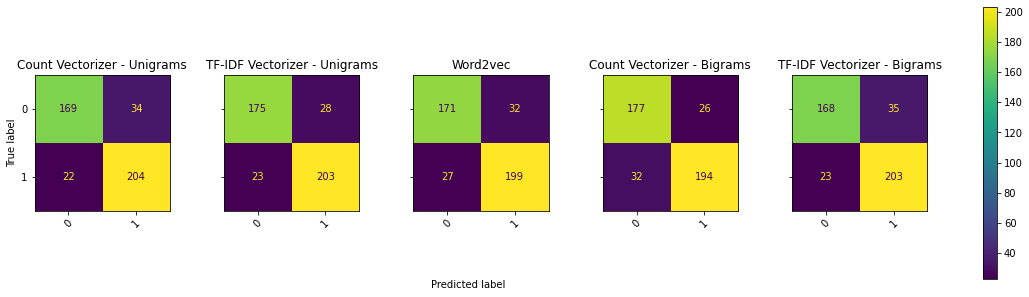

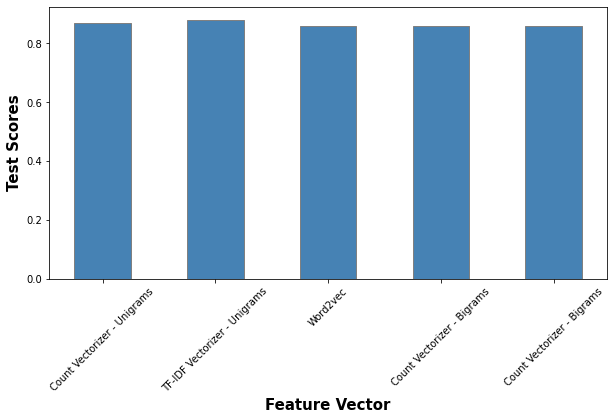

In [ ]:
# svm=SVC()
# results(svm, train_count_vec.toarray(), y_train, test_count_vec.toarray(), y_test)
#

scaler = MinMaxScaler()
selector = VarianceThreshold()
clf=SVC()

pipe = Pipeline(steps=[('scaler', scaler), ('svm', clf)], memory = 'tmp')
C = [0.1,0.5,1.0,2.0]
kernel = ['poly', 'rbf', 'sigmoid']

estimator = GridSearchCV(pipe, dict(svm__C=C, svm__kernel = kernel), cv=5, scoring='f1_macro', n_jobs=-1)

train_scores = []
test_scores = []
preds=[]


all_results(estimator, train_count_vec, test_count_vec)
all_results(estimator, train_tfidf_vec, test_tfidf_vec)
all_results(estimator, train_word2vec, test_word2vec)

all_results(estimator, train_count_vec_bigrams, test_count_vec_bigrams)
all_results(estimator, train_tfidf_vec_bigrams, test_tfidf_vec_bigrams)

plots(preds)

t_scores(test_scores)



Pipeline(memory='tmp',
         steps=[('scaler', MinMaxScaler()),
                ('rf', RandomForestClassifier(n_estimators=150))])
{'rf__n_estimators': 150}
0.8905669877039069
-------------------------
1.0
0.9158823529411766
Train score : 1.0
Test score : 0.92
-------------------------
Pipeline(memory='tmp',
         steps=[('scaler', MinMaxScaler()),
                ('rf', RandomForestClassifier(n_estimators=200))])
{'rf__n_estimators': 200}
0.8855164023023553
-------------------------
1.0
0.890098928951026
Train score : 1.0
Test score : 0.89
-------------------------
Pipeline(memory='tmp',
         steps=[('scaler', MinMaxScaler()), ('rf', RandomForestClassifier())])
{'rf__n_estimators': 100}
0.7804517398628561
-------------------------
1.0
0.8062573115324972
Train score : 1.0
Test score : 0.81
-------------------------
Pipeline(memory='tmp',
         steps=[('scaler', MinMaxScaler()), ('rf', RandomForestClassifier())])
{'rf__n_estimators': 100}
0.8702432040203171
----------------

,precision,recall,f1-score,support
0,0.916256,0.907317,0.911765,205.000000
1,0.915929,0.924107,0.920000,224.000000
accuracy,0.916084,0.916084,0.916084,0.916084
macro avg,0.916093,0.915712,0.915882,429.000000
weighted avg,0.916085,0.916084,0.916065,429.000000


,precision,recall,f1-score,support
0,0.881773,0.886139,0.883951,202.000000
1,0.898230,0.894273,0.896247,227.000000
accuracy,0.890443,0.890443,0.890443,0.890443
macro avg,0.890002,0.890206,0.890099,429.000000
weighted avg,0.890481,0.890443,0.890457,429.000000


,precision,recall,f1-score,support
0,0.812808,0.785714,0.799031,210.000000
1,0.800885,0.826484,0.813483,219.000000
accuracy,0.806527,0.806527,0.806527,0.806527
macro avg,0.806846,0.806099,0.806257,429.000000
weighted avg,0.806721,0.806527,0.806409,429.000000


,precision,recall,f1-score,support
0,0.911330,0.852535,0.880952,217.00000
1,0.858407,0.915094,0.885845,212.00000
accuracy,0.883450,0.883450,0.883450,0.88345
macro avg,0.884869,0.883814,0.883399,429.00000
weighted avg,0.885177,0.883450,0.883370,429.00000


,precision,recall,f1-score,support
0,0.876847,0.890000,0.883375,200.000000
1,0.902655,0.890830,0.896703,229.000000
accuracy,0.890443,0.890443,0.890443,0.890443
macro avg,0.889751,0.890415,0.890039,429.000000
weighted avg,0.890623,0.890443,0.890489,429.000000


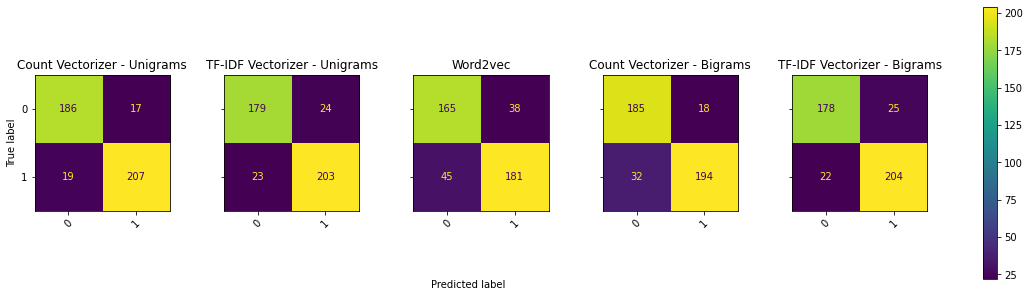

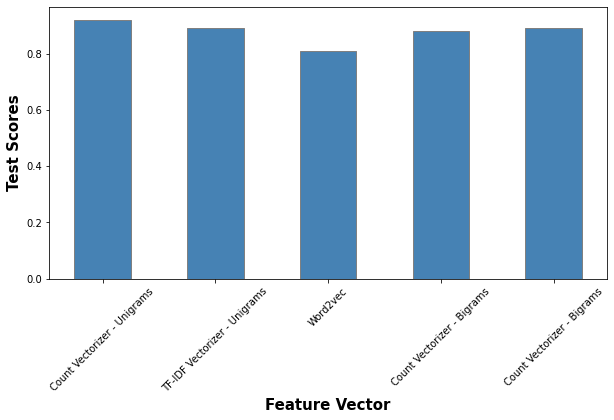

In [ ]:
# rf=RandomForestClassifier()
# results(rf, train_count_vec.toarray(), y_train, test_count_vec.toarray(), y_test)
#

scaler = MinMaxScaler()
selector = VarianceThreshold()
clf=RandomForestClassifier()

pipe = Pipeline(steps=[('scaler', scaler), ('rf', clf)], memory = 'tmp')
estimators = [50,100,150,200,250]

estimator = GridSearchCV(pipe, dict(rf__n_estimators=estimators), cv=5, scoring='f1_macro', n_jobs=-1)



train_scores = []
test_scores = []
preds=[]

all_results(estimator, train_count_vec, test_count_vec)
all_results(estimator, train_tfidf_vec, test_tfidf_vec)
all_results(estimator, train_word2vec, test_word2vec)

all_results(estimator, train_count_vec_bigrams, test_count_vec_bigrams)
all_results(estimator, train_tfidf_vec_bigrams, test_tfidf_vec_bigrams)

plots(preds)

t_scores(test_scores)


In [ ]:
# xgb=xgb.XGBClassifier(objective="binary:logistic", random_state=42)
# results(xgb, train_count_vec.toarray(), y_train, test_count_vec.toarray(), y_test)


# scaler = MinMaxScaler()
# selector = VarianceThreshold()
# clf=xgb.XGBClassifier(objective="binary:logistic", random_state=42)
#
# pipe = Pipeline(steps=[('scaler', scaler), ('xgb', clf)], memory = 'tmp')
# solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
#
# estimator = GridSearchCV(pipe, dict(xgb_solver=solver), cv=5, scoring='f1_macro', n_jobs=-1)
# estimator.fit(train_count_vec.toarray(), y_train)
#
#
# all_results(estimator, train_count_vec.toarray(), test_count_vec.toarray())
# all_results(estimator, train_tfidf_vec.toarray(), test_tfidf_vec.toarray())
# all_results(estimator, train_word2vec, test_word2vec)


Pipeline(memory='tmp',
         steps=[('scaler', MinMaxScaler()),
                ('gbc', GradientBoostingClassifier(n_estimators=150))])
{'gbc__n_estimators': 150}
0.9101152019326151
-------------------------
0.9912517853499285
0.924963924963925
Train score : 0.99
Test score : 0.92
-------------------------
Pipeline(memory='tmp',
         steps=[('scaler', MinMaxScaler()),
                ('gbc', GradientBoostingClassifier(n_estimators=200))])
{'gbc__n_estimators': 200}
0.9137875388550482
-------------------------
1.0
0.9321117337946163
Train score : 1.0
Test score : 0.93
-------------------------
Pipeline(memory='tmp',
         steps=[('scaler', MinMaxScaler()),
                ('gbc', GradientBoostingClassifier(n_estimators=250))])
{'gbc__n_estimators': 250}
0.7864099766639954
-------------------------
1.0
0.7992185119073534
Train score : 1.0
Test score : 0.8
-------------------------
Pipeline(memory='tmp',
         steps=[('scaler', MinMaxScaler()),
                ('gbc', Gradien

,precision,recall,f1-score,support
0,0.896552,0.943005,0.919192,193.000000
1,0.951327,0.911017,0.930736,236.000000
accuracy,0.925408,0.925408,0.925408,0.925408
macro avg,0.923940,0.927011,0.924964,429.000000
weighted avg,0.926685,0.925408,0.925542,429.000000


,precision,recall,f1-score,support
0,0.916256,0.939394,0.927681,198.000000
1,0.946903,0.926407,0.936543,231.000000
accuracy,0.932401,0.932401,0.932401,0.932401
macro avg,0.931579,0.932900,0.932112,429.000000
weighted avg,0.932758,0.932401,0.932453,429.000000


,precision,recall,f1-score,support
0,0.802956,0.779904,0.791262,209.000000
1,0.796460,0.818182,0.807175,220.000000
accuracy,0.799534,0.799534,0.799534,0.799534
macro avg,0.799708,0.799043,0.799219,429.000000
weighted avg,0.799625,0.799534,0.799423,429.000000


,precision,recall,f1-score,support
0,0.827586,0.913043,0.868217,184.000000
1,0.929204,0.857143,0.891720,245.000000
accuracy,0.881119,0.881119,0.881119,0.881119
macro avg,0.878395,0.885093,0.879968,429.000000
weighted avg,0.885619,0.881119,0.881639,429.000000


,precision,recall,f1-score,support
0,0.817734,0.902174,0.857881,184.000000
1,0.920354,0.848980,0.883227,245.000000
accuracy,0.871795,0.871795,0.871795,0.871795
macro avg,0.869044,0.875577,0.870554,429.000000
weighted avg,0.876340,0.871795,0.872356,429.000000


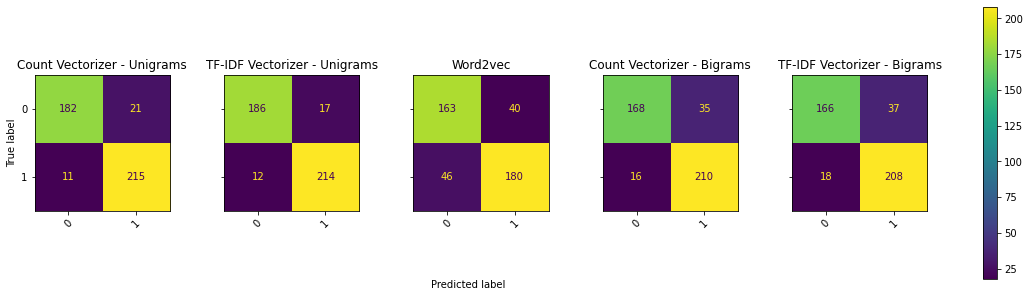

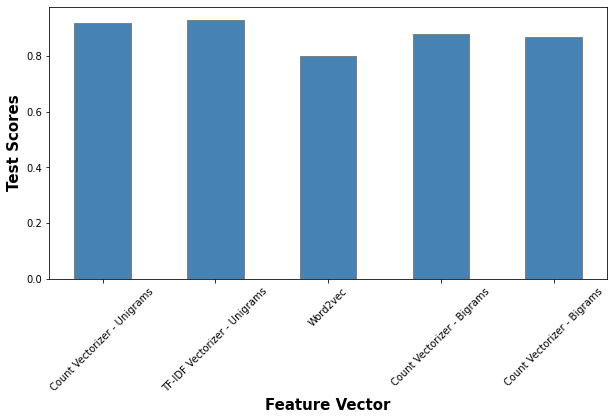

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

scaler = MinMaxScaler()
clf = GradientBoostingClassifier()

pipe = Pipeline(steps=[('scaler', scaler), ('gbc', clf)], memory = 'tmp')
estimators = [50,100,150,200,250]

estimator = GridSearchCV(pipe, dict(gbc__n_estimators=estimators), cv=5, scoring='f1_macro', n_jobs=-1)
estimator.fit(train_count_vec, y_train)


train_scores = []
test_scores = []
preds=[]

all_results(estimator, train_count_vec, test_count_vec)
all_results(estimator, train_tfidf_vec, test_tfidf_vec)
all_results(estimator, train_word2vec, test_word2vec)

all_results(estimator, train_count_vec_bigrams, test_count_vec_bigrams)
all_results(estimator, train_tfidf_vec_bigrams, test_tfidf_vec_bigrams)


plots(preds)

t_scores(test_scores)